In [1]:
import pandas as pd
df = pd.read_csv('../datasets/real_estate_data.csv', sep='\t')
df = df.drop_duplicates()

# 1. Предобработайте данные по недвижимости и оставьте только те города, в которых количество объявлений больше 50

In [2]:
# получаю таблицу с количеством объявлений по городам
over_fifty = df.groupby('locality_name').agg({'total_images': 'count'})

In [3]:
# изменияю название колонны для удобства
over_fifty = over_fifty.rename({'total_images': 'amount'}, axis=1)

In [4]:
# получаю таблицу с кол-вом объявлений больше 50шт., отстортированную по убыванию
over_fifty = over_fifty.query('amount > 50').sort_values('amount', ascending=False).reset_index()

In [5]:
'''
Произвожу слияние таблиц (over_fifty and df), для того чтобы получить оригинальный 
датасет, но содержащий города в которых кол-во объявлений больше 50шт.
Использовать буду параметр inner, так как он самый подходящий в этом случае
Колонна по которой будет происходить отбор - locality_name
'''
data = df.merge(over_fifty, on=['locality_name'], how='inner')

In [6]:
# проверка. визуально мы видим что кол-во объявлений в таблице data всегда больше 50
test = data.groupby('locality_name').agg({'total_images': 'count'})
test = test.rename({'total_images': 'amount'}, axis=1)
test

,amount
locality_name,
Волхов,111
Всеволожск,398
Выборг,237
Гатчина,307
Кингисепп,104
Кириши,125
Кировск,84
Колпино,338
Коммунар,89


In [ ]:
data.info()

In [ ]:
df.info()

# 2. Постройте круговую диаграмму по сумме цен на недвижимость, разбитых по городам

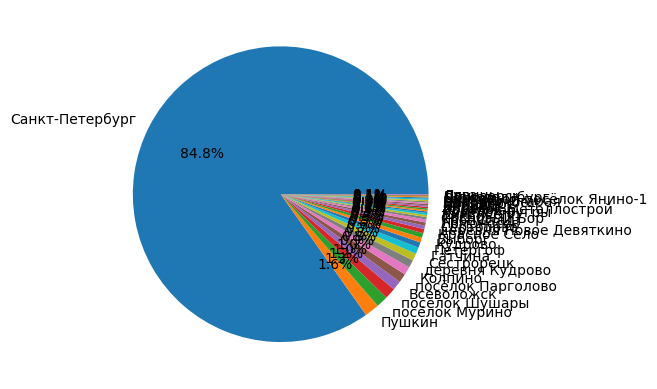

In [32]:
import matplotlib.pyplot as plt

# создам таблицу в соответствии с заданием
# если я правильно понял то нужно использовать таблицу где кол-во объявлений больше 50, как исходную (data в моем случае)
chart = data.groupby('locality_name').agg({'last_price': 'sum'}).reset_index().sort_values('last_price', ascending=False)

# цифры слишком большие, поэтому разделю их на 1 000 000
# результат положу в новый столбец
chart['price_mln'] = round(chart['last_price'] / 1000000, 2)
# chart

# подготовим переменные для чарта
sizes = chart['price_mln']
labels = chart['locality_name']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

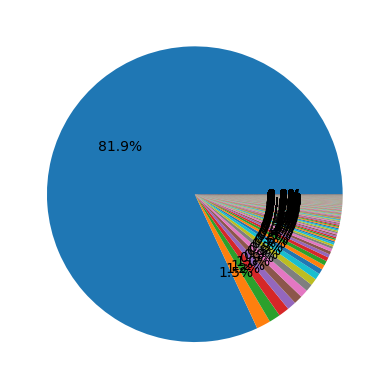

In [21]:
# сдеолаю то же самое используя оригинальный датасет, для сравнения
chart2 = df.groupby('locality_name').agg({'last_price': 'sum'}).reset_index().sort_values('last_price', ascending=False)
chart2['price_mln'] = round(chart2['last_price'] / 1000000, 2)

sizes = chart2['price_mln']
labels = chart2['locality_name']

x = plt.pie(sizes, autopct='%1.1f%%')
plt.show()